# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [4]:
# Import the visualization code
import visuals as vs
import pandas as pd

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**  
The Smartcab does not move at all in the initial run of the simulation. Throughout the simulation the agent receives varying numeric reward. If the agent idles at a red light it receives a positive reward, if the agent idles at a green light with no oncoming traffic then it receives a negative reward, and if the agent idles with oncoming traffic it receives a positive reward.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- *Flags*
    - The verbose flag when creating the environment prints additional output to the command line. The additional output includes data on the location and heading of the car, as well as things like the color of the light and the number of violations the agent has had.
    - The learning flag on the create_agent method forces the agent to begin using q-learning.
    - The log_metrics flag controls wether or not the simulation generates log files.
    
- The act method is called every time the agent performs an action.

- The render() method render's the simulation in the pygame GUI. The render_text() function prints the result of the simulation to the command line.

- The planner.py file considers the East-West direction and then considers the North-South direction.

    

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


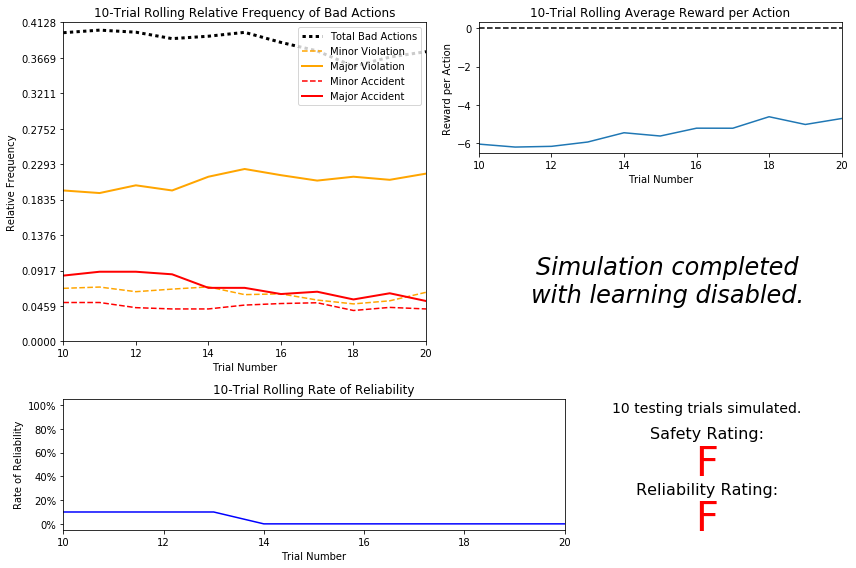

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning_static.csv')

In [3]:
# Just some summary statistics to get an idea of how many steps are being completed in each trial
df = pd.read_csv('logs/sim_no-learning_static.csv')
df['Steps'] = df['initial_deadline'] - df['final_deadline']
df.describe()

,trial,initial_deadline,final_deadline,net_reward,success,Steps
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,8.833333,23.166667,0.333333,-123.906289,0.066667,22.833333
std,5.614534,4.449590,1.493280,72.758243,0.253708,4.323818
min,1.000000,20.000000,0.000000,-298.169533,0.000000,18.000000
25%,4.250000,20.000000,0.000000,-170.631037,0.000000,20.000000
50%,8.000000,20.000000,0.000000,-121.542157,0.000000,20.000000
75%,12.750000,25.000000,0.000000,-65.021559,0.000000,25.000000
max,20.000000,35.000000,8.000000,-18.630491,1.000000,35.000000


### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- From the above visualization it appears the agent is making bad decisions around 37% to 41% of the time, in this simulation. Approximately 5%-10% of the time the agent gets in a major accident.
- The agent is extremely unreliable, which makes sense because it is randomly choosing actions. Because of the randomness, the agent does occasionally reach its destination in the allotted time, however this is very rare.
- On average the agent is receiving a reward of approximately -5 per action. This is a relatively large negative reward per action, it means that most of the time the agent is doing the wrong thing, which makes sense because the agent is randomly choosing actions.
- As the number of trials increases the outcome does not change significantly, which makes sense because the agent is not learning.
- This Smartcab would not be considered safe or reliable. The cab rarely gets to its destination and often gets in accidents.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**  
`light`, `left`, and `oncoming` are the only features which matter for both safety and efficiency. The remaining features are really only applicable to either safety or efficiency. If the Smartcab drives through a red `light` then it could get in an accident, impacting safety, if the Smartcab idles at a red light then it can lose valuable time and impact reliability. If there is no traffic coming from the left and a light is red then the Smartcab can safely make a right turn, hence impacting both the safety and reliability of the Smartcab. To make a safe left turn the Smartcab must know if there is any oncoming traffic and what their planned direction of travel is, this also impacts how quickly the cab can get to its destination. `Waypoint` and `deadline` really only affect reliability, as they determine if the cab can get to its destination in the allotted time. Assuming standard traffic laws apply, `right` has no effect on safety or reliability; the only time a car on the right would interfere with the agent is if either car is disobeying the traffic signals.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**  
Waypoint has `3` possible states (left, right, forward), light has `2` possible states (R,G), left, right and oncoming all have `4` possible states (None, left, right, forward). So the size of the state space is `3 * 2 * 4 * 4 * 4 = 384`. 

We could omit the possible states of right as the only time a car on the right would interfere with our car would be if both cars have green lights, which should not happen. However, in the spirit of learning the traffic laws I decided not to omit this state. Not omitting the state of right also will allow for the learner to be generalized to other countries where cars might drive on the opposite side of the road or the traffic laws may differ. 

384 is a large number of states to explore, however on each trial our agent completes as many as 35 moves and we are currently using 20 trials meaning our agent has the ability to explore up to 700 states. It is likely that the agent will end up exploring significantly less than 700 states during training, as it might reach its destination in less moves than the deadline allows, or the agent could have a deadline that only allows for 20 moves. It does appear that the driving agent could learn a policy for each possible state within a reasonable number of training trials.

It's worth noting that `deadline` could also be factored into the state space, however this would increase the size of the state space significantly. `Deadline` could be as large as 35 which would increase the number of possible states to 13,440, making it very difficult for our agent to learn all possible states. If `Deadline` were to be used then it would need to be transformed to something like a boolean for `is_close_to_deadline`. The agent will learn information about deadline from the size of the rewards it receives so omitting `deadline` from the state space should have little impact on our model. `Deadline` could be used to get the Smartcab to safely break traffic laws. If deadline was used the Smartcab could learn to run red lights when it is approaching the deadline. However, the current model does not account for future rewards so using deadline in this manner does not make sense.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

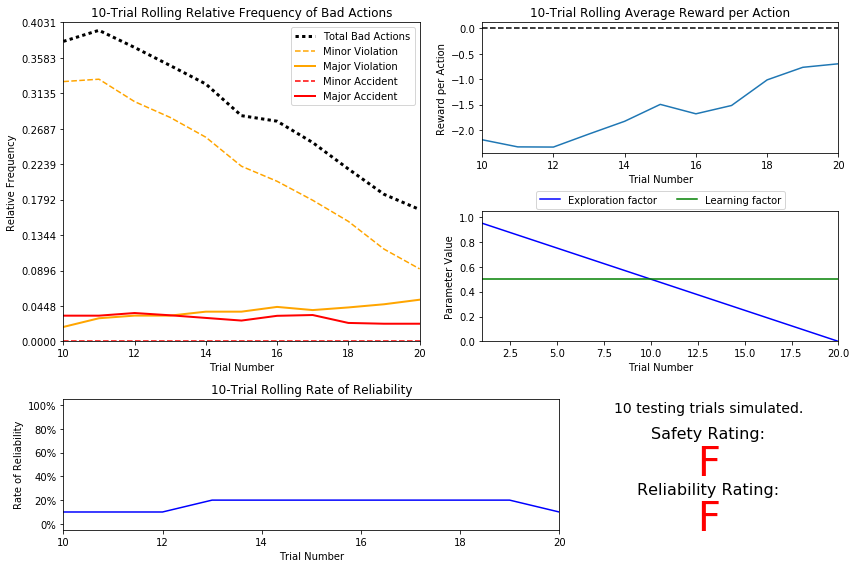

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** 

When implementing basic Q-learning in the smart cab simulation there are notable gains in performance over an agent that simply chooses random actions. The most significant performance gains are in the agents safety, with minimal gains in reliability. The above plot shows total bad actions decreasing significantly with each trial, and not much improvement in reliability.

In this initial trial the agent only completes 20 training trials. The testing results make sense for the number of trials performed. As the number of trials increases, overall bad actions decrease and there is negligible improvement in reliability, this is driven by the reward structure. The reward received for traffic violations and accidents fully outweighs the reward for moving in the correct direction. If the agent cannot avoid accidents and obey traffic laws it will learn little about reliability. The reward structure makes sense as it reflects reality; a smart cab that never gets in an accident, but never gets to its destination, is better than a smart cab that sometimes gets to its destination, but often gets in accidents. The agent will need to operate safely before it can learn about reliability.

Increasing the number of trials should help our agent learn how to operate safely and then hone its reliability. The number of trials is limited by the exploration factor epsilon, which is controlled by a decay function. When the exploration factor drops bellow 0.05 training stops, since the agent isn’t exploring new states, and the simulation moves to testing. The current exploration factor is initialized at 1 and decays by 0.05 each trial, resulting in 20 trails before the exploration factor drops bellow 0.05. The decay function is linear as seen by the parameter plot above.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

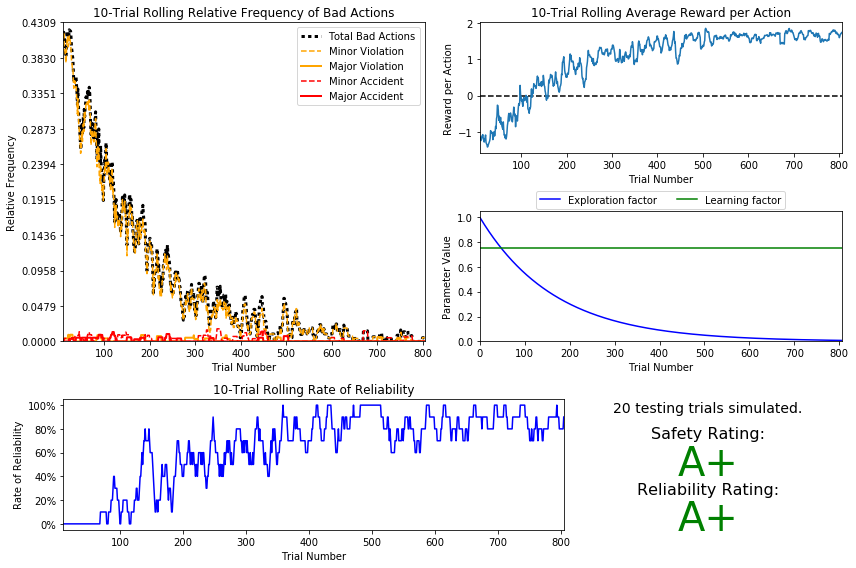

In [13]:
vs.plot_trials('sim_improved-learning_static.csv')

In [6]:
# Another look at some descriptive stats to see how many steps per trial are occuring
df = pd.read_csv('logs/sim_improved-learning.csv')
df['Steps'] = df['initial_deadline'] - df['final_deadline']
df.describe()

,trial,initial_deadline,final_deadline,net_reward,success,Steps
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,393.484848,23.824242,5.883636,16.407977,0.627879,17.940606
std,237.499888,4.246574,6.120635,18.136749,0.483664,6.557632
min,1.000000,20.000000,0.000000,-72.413931,0.000000,4.000000
25%,187.000000,20.000000,0.000000,10.882528,0.000000,12.000000
50%,393.000000,25.000000,5.000000,20.304927,1.000000,19.000000
75%,599.000000,25.000000,11.000000,27.665814,1.000000,21.000000
max,805.000000,35.000000,26.000000,53.203688,1.000000,35.000000


### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**  
Significant gains in both safety and reliability are seen after adjusting some of the agents parameters. The agent moved from failing on both safety and reliability, to getting an A+ in each of those categories. After learning, the agent was able to commit no traffic violations and always choose the correct action based on the conditions at the intersection. The agent was also able to reach its destination on time in every testing trial. Additionally, the agent moved to receiving rewards of approximately +2, signaling the agent is performing correct actions. Epsilon, the exploration factor, and alpha, the learning rate, were the two main points of focus for tuning the model. 

Epsilon was defined by the decay function $\epsilon = e^{-at}$, with `a` set to 0.006. Several decay functions were tested but this exponential decay function had the most favorable behavior. `a` was used in conjunction with the training threshold for epsilon to control the number of trials performed. Making `a` smaller increased the number of trials by essentially increasing the slope of the decay function. Because the decay function approaches zero in the limit adjusting the tolerance really just adjusts the number of trails completed with a very small exploration factor. A tolerance of 0.008 was found to be optimal. The decay function and tolerance resulted in approximately 800 trials being performed before testing.

A learning rate of 0.75 was found to be optimal. The rate of 0.75 was determined primarily through trial and error but does make some sense intuitively. The rate of 0.75 means that the agent does not retain a significant amount of previous information. As discussed earlier the penalties for traffic violations and collisions far out way the penalties for not following the correct waypoint. Once the agent has learned not to get in collisions and obey traffic laws a high learning rate allow it to learn to follow the correct waypoint more quickly. Its also worth noting that the first time the agent encounters a state the learning rate is set to 1, this is because the initialization value, zero, contains no information about the state.

I am very pleased with the results of this trial, it does appear that the agent successfully learned the optimal policy. It would be nice to see the agent require fewer trials to learn the optimal policy. One way to work towards this would be looking at ways to reduce the state space, such are removing the state of the car to our agents right.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

For this project the optimal policy that the agent is trying to learn, for a given state, is basically just what the U.S. traffic right-of-way law states. The optimal policy for every state will simply be to follow the waypoint if the right-of-way law allows. Bellow we’ll look at a few of the more unique states which the agent will encounter.

#### (waypoint = right, light=red, oncoming=right, left=None, right=None)

Rewards:  
 -- forward : 0.00  
 -- None : 1.40  
 -- right : 0.00  
 -- left : 0.00  

The optimal policy for this state is to turn right. In our environment it is legal to make a right turn at a red light, which is what the actual US right of way law states.

The actual policy for this state appears to be do nothing. Looks like the agent did not learn the right on red law. The other actions all have zero value which means the agent never attempted those actions, maybe the exploration factor should have been kept higher longer or we needed more trials.

#### (waypoint=left, light=green, oncoming=forward, left=left, right=right)

Rewards:  
 -- forward : 1.13  
 -- None : -4.64  
 -- right : 0.00  
 -- left : 0.00  

The optimal policy for this state in a typical US city would be to make a left turn when traffic allows. However, in our grid world the agent is penalized for idling at a green light so the optimal policy for the grid world is actually to go forward or right. Because the agent is not taking into account future rewards it does not know if forward or right is the optimal choice.

Looks like the optimal policy here is to go straight, as expected. It’s worth noting here too that we still have some zero entries, which means the agent did not try every action. As noted preciously, `right` could be an optimal action, however it looks like the agent never attempted that action here.

#### (waypoint=forward, light=green, oncoming=left, left=None right=None)

Rewards:  
 -- forward : 1.82  
 -- None : 0.54  
 -- right : -0.42  
 -- left : -0.11   
 
The optimal policy for this state is to go forward. The oncoming car which wants to turn left should yield to avoid a collision.

The agent did learn the optimal policy of `forward` for this state. It also appears that the agent attempted all of the possible actions for this state, which is good to see that the agent was exploring. It’s also interesting to note that the agent received a small positive reward in this state for doing nothing, whereas with other states, which the light is green, the agent receives negative reward for doing nothing. This reflects US traffic laws where you are not penalized for being nice and yielding for someone trying to make a left turn at an intersection. The reward structure of the grid world reflects the aforementioned structure of US traffic patterns.

The Smartcab has gotten very close to learning the optimal policy for every state in the grid world. The plots in question 7 show that the Smartcab performs very well in testing, however the plots for training show that the agent approaches the optimal policy but there is still some degree of error. The sample state policy pairs investigated above show the agent performing somewhat optimally, however there is still room for improvement, such as learning the right on red policy. One point of concern is that the agent has not attempted every action for the above states, which shows that the agent still has some exploring to do. In future trials, keeping the exploration rate higher for longer should help the agent explore more state action pairs and master the full optimal policy. Additionally, different initialization values for the Q table could be experimented with. Initializing the Q table with high values could ensure that the agent explores ever state action pair. Overall though, with the current parameters, the agent has done very at learning the optimal policy.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**  
In this project we have ignored the future rewards component of the Q-Learning algorithm due to a couple limitations of the simulation. The first reason is that sequence of states is not constant. The agent will move through states in a different order most trials. This is because the agent starts in a new place every trial and has a different destination every trial, the states of lights and other cars also change throughout the simulation. As a result the agent cannot expect to see states occur in a certain sequence, which means the agent cannot propagate back future rewards.

Additionally, we cannot use future rewards because the Smartcab does not plan what it’s action will be at the next intersection. The planning function for the Smartcab only gives actions for the current intersection, not the next intersection it will be at.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.